In [1]:
from utils import *

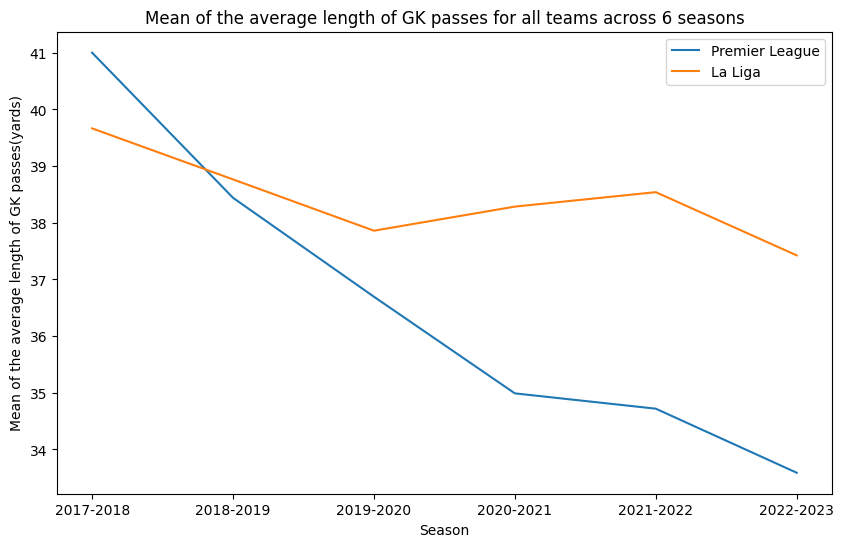

           League  Tau   P-Value  \
0  Premier League -1.0  0.002778   
1         La Liga -0.6  0.136111   

                                              Trend  
0      Decreasing trend (p = 0.0028, tau = -1.0000)  
1  No significant trend (p = 0.1361, tau = -0.6000)  


<Figure size 640x480 with 0 Axes>

In [2]:
calc_and_plot_adv_trends(
    feature = 'gk_passes_length_avg',
    seasons=['2017-2018', '2018-2019', '2019-2020', '2020-2021', '2021-2022', '2022-2023']
)

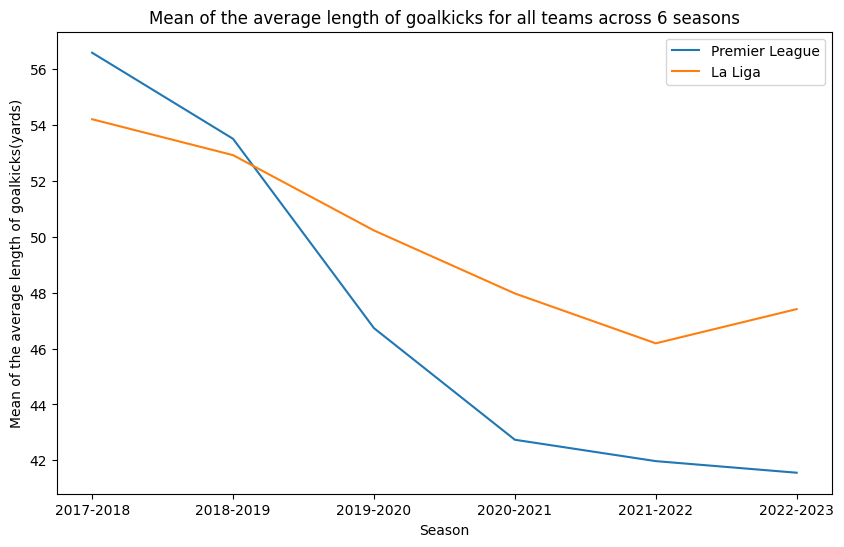

           League       Tau   P-Value  \
0  Premier League -1.000000  0.002778   
1         La Liga -0.866667  0.016667   

                                          Trend  
0  Decreasing trend (p = 0.0028, tau = -1.0000)  
1  Decreasing trend (p = 0.0167, tau = -0.8667)  


<Figure size 640x480 with 0 Axes>

In [3]:
calc_and_plot_adv_trends(
    feature = 'gk_goal_kick_length_avg',
    seasons=['2017-2018', '2018-2019', '2019-2020', '2020-2021', '2021-2022', '2022-2023']
)

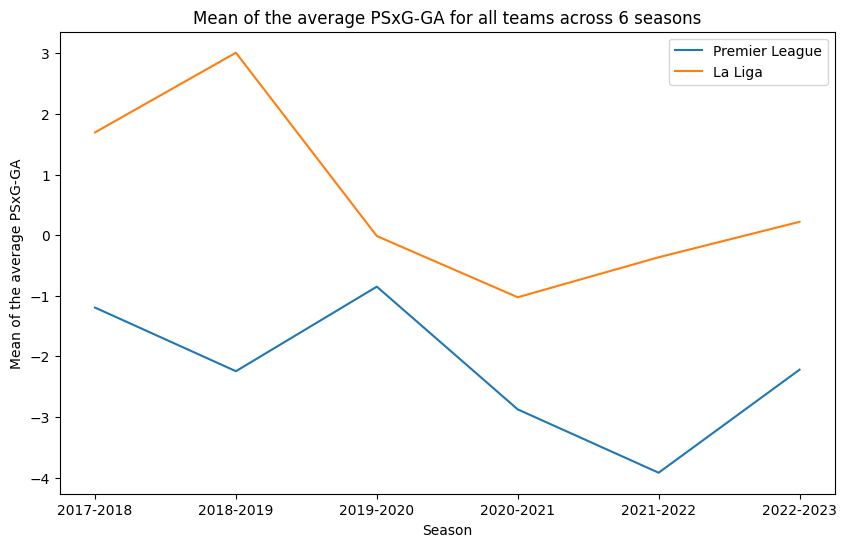

           League       Tau   P-Value  \
0  Premier League -0.333333  0.469444   
1         La Liga -0.333333  0.469444   

                                              Trend  
0  No significant trend (p = 0.4694, tau = -0.3333)  
1  No significant trend (p = 0.4694, tau = -0.3333)  


<Figure size 640x480 with 0 Axes>

In [4]:
calc_and_plot_adv_trends(
    feature = 'gk_psxg_net',
    seasons=['2017-2018', '2018-2019', '2019-2020', '2020-2021', '2021-2022', '2022-2023']
)

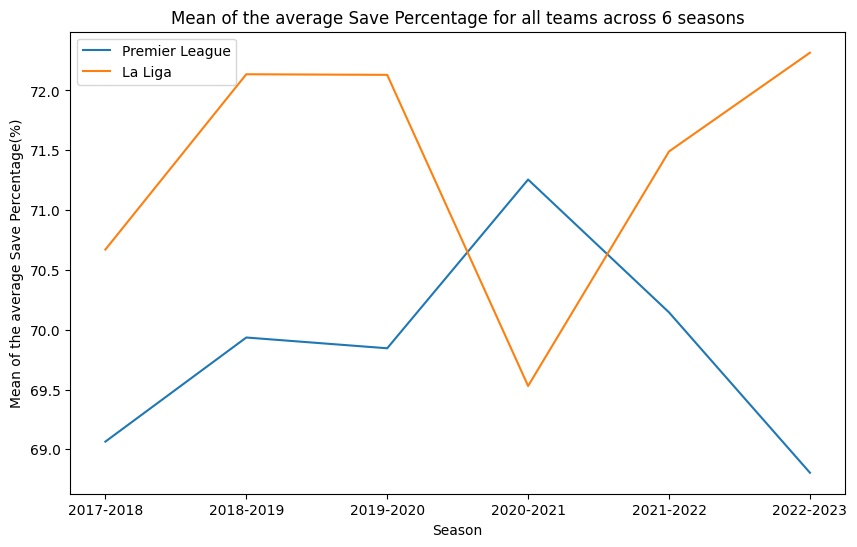

           League       Tau   P-Value  \
0  Premier League  0.066667  1.000000   
1         La Liga  0.200000  0.719444   

                                             Trend  
0  No significant trend (p = 1.0000, tau = 0.0667)  
1  No significant trend (p = 0.7194, tau = 0.2000)  


<Figure size 640x480 with 0 Axes>

In [5]:
calc_and_plot_trad_trends(
    feature = 'gk_save_pct',
    seasons=['2017-2018', '2018-2019', '2019-2020', '2020-2021', '2021-2022', '2022-2023']
)

Short mean = 86.74874999999999, short std = 3.3683079487333094
Long mean = 53.48708333333333, long std = 6.8706228363753326


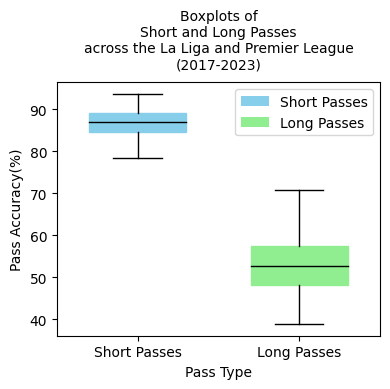

<Figure size 640x480 with 0 Axes>

In [2]:
plot_passing_boxplots()

In [2]:
season = '2024-2025'
season_start, season_with_end = encode_season(season_str = season)
league = 'Premier League'
encoded_league = league_url_idx[league]
prefix = f'https://fbref.com/en/comps/{encoded_league}/{season_start}/'
suffix = f'/{season_with_end}{league.replace(" ", "-")}-Stats'+'#all_stats_keeper'
#df = get_keeper_data(top = prefix, end = suffix)
#df.head()
res = requests.get(prefix+'keepers'+'suffix')
comm = re.compile("")
soup = BeautifulSoup(comm.sub("",res.text),'lxml')
all_tables = soup.findAll("tbody")
len(all_tables)

IndexError: list index out of range